Initial Dataset:


,Student_ID,Name,Age,Gender,Major,Exam_Score,Assignment_Score,Attendance_Percentage,Study_Hours_Per_Week,Extracurricular_Activities
0,101,Alice,18,F,CS,85,90,92.5,15,2.0
1,102,Bob,19,M,Math,92,88,88.0,20,3.0
2,103,Charlie,18,M,Physics,78,92,95.5,12,1.0
3,104,David,20,M,CS,88,85,90.0,18,2.0
4,105,Eva,18,F,Biology,95,95,98.2,25,4.0
5,106,Frank,19,M,Math,82,78,76.8,10,1.0
6,107,Grace,18,F,CS,90,92,94.5,22,3.0
7,108,Henry,20,M,Physics,76,80,85.2,14,2.0
8,109,Ivy,19,F,Biology,89,88,91.3,19,1.0
9,110,Jack,18,M,Math,120,75,82.7,8,NaN



Missing Values Summary:
Student_ID                    0
Name                          0
Age                           0
Gender                        0
Major                         0
Exam_Score                    0
Assignment_Score              0
Attendance_Percentage         0
Study_Hours_Per_Week          0
Extracurricular_Activities    1
dtype: int64

After handling missing values:
Student_ID                    0
Name                          0
Age                           0
Gender                        0
Major                         0
Exam_Score                    0
Assignment_Score              0
Attendance_Percentage         0
Study_Hours_Per_Week          0
Extracurricular_Activities    0
dtype: int64

Unique values in categorical columns:
Gender: ['F' 'M']
Major: ['CS' 'Math' 'Physics' 'Biology']

Exam Score range: 76 - 120
Outliers detected:
Exam_Score: 1 outliers
9    120
Name: Exam_Score, dtype: int64


C:\Users\AISHWARYA\AppData\Local\Temp\ipykernel_21636\33911644.py:51: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Extracurricular_Activities'].fillna(extracurricular_median, inplace=True)


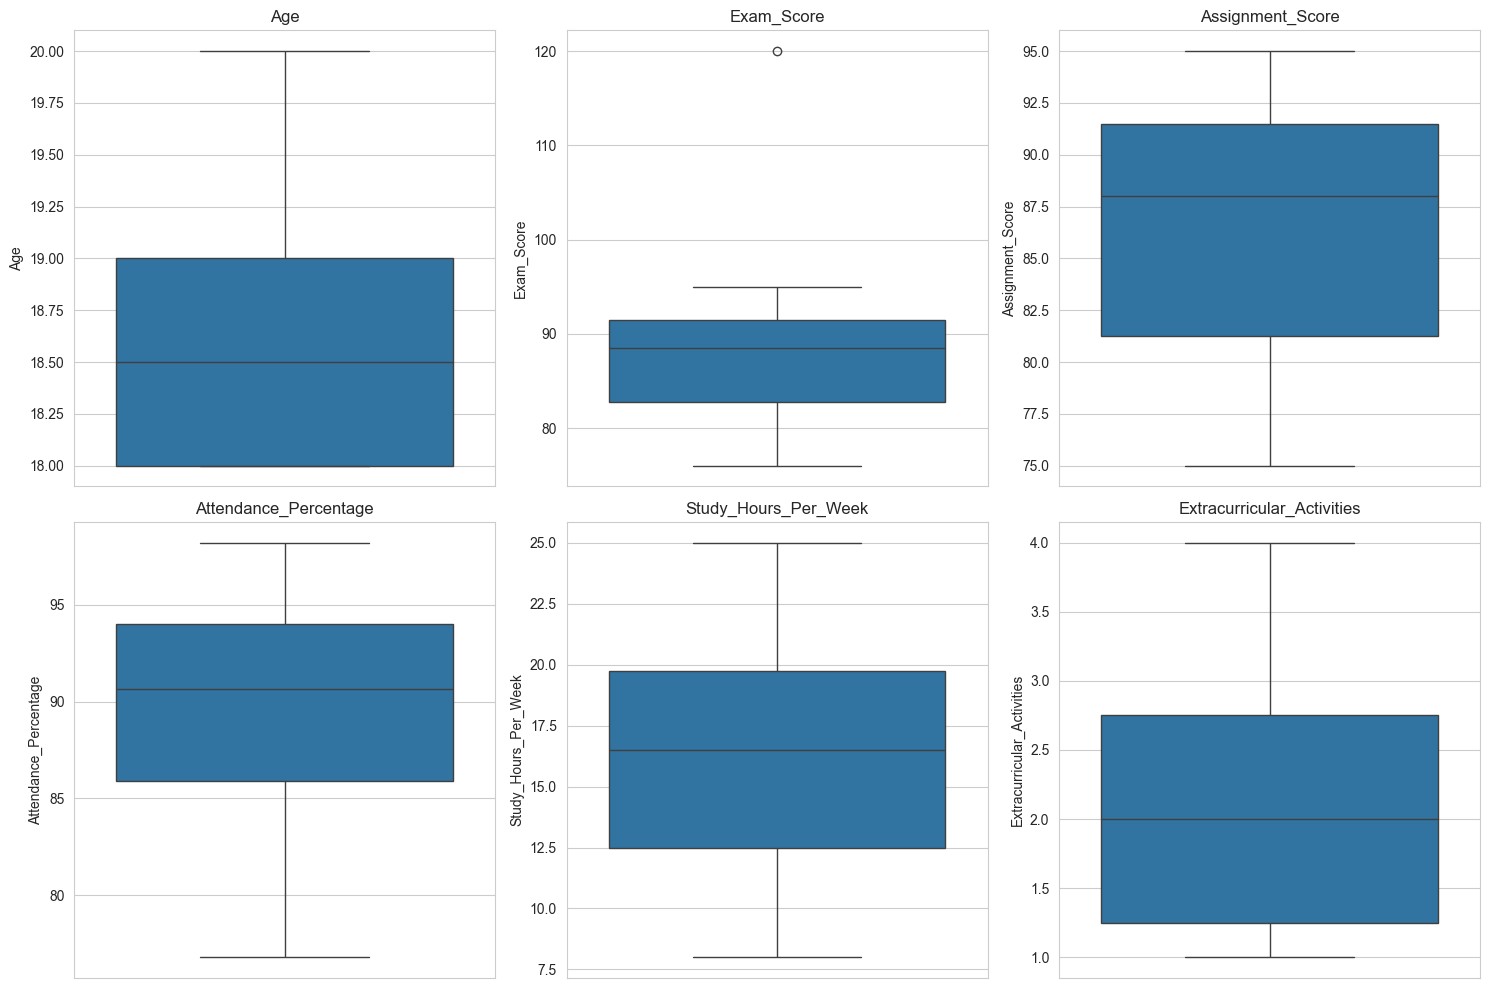


After handling outliers:
Age: 0 outliers
Exam_Score: 0 outliers
Assignment_Score: 0 outliers
Attendance_Percentage: 0 outliers
Study_Hours_Per_Week: 0 outliers
Extracurricular_Activities: 0 outliers


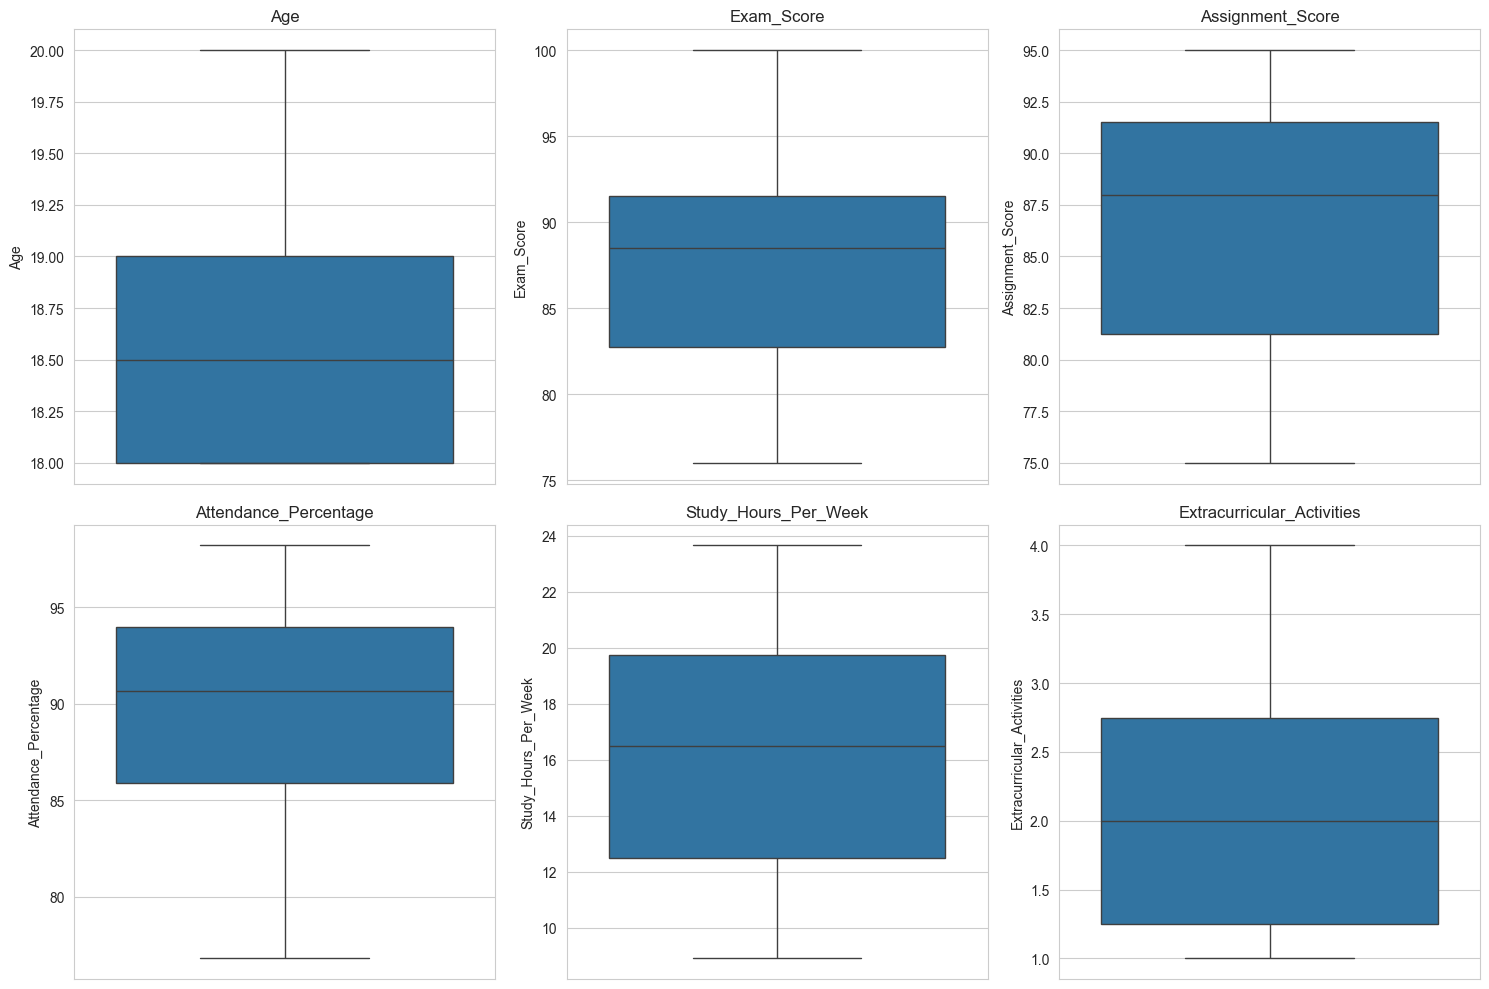

Original skewness: -0.06
Transformed skewness: -0.44


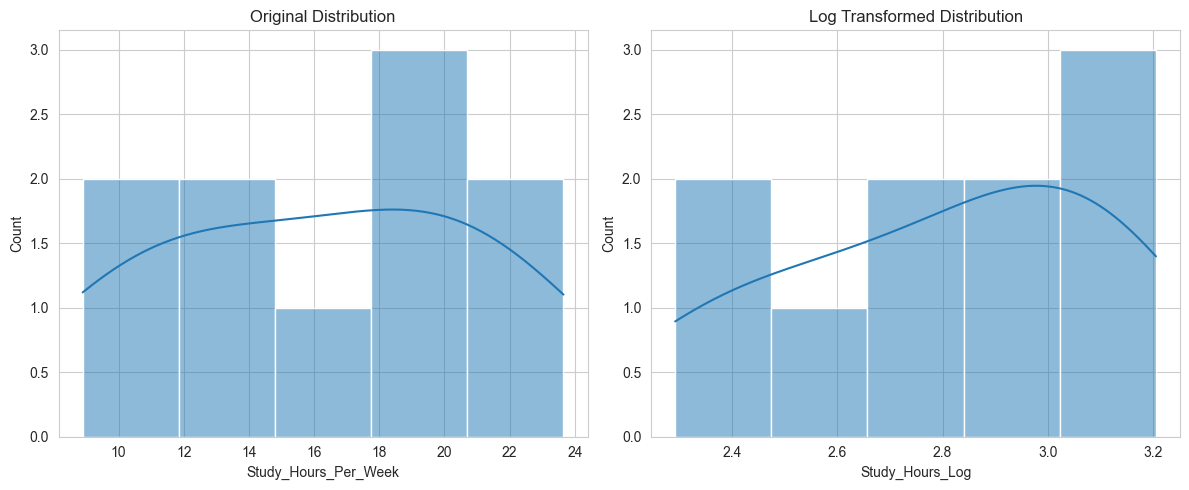


Standardized Exam Scores:
   Exam_Score  Exam_Score_Z
0          85     -0.353377
1          92      0.636078
2          78     -1.342832
3          88      0.070675
4          95      1.060130

Final Cleaned Dataset:


,Student_ID,Name,Age,Gender,Major,Exam_Score,Assignment_Score,Attendance_Percentage,Study_Hours_Per_Week,Extracurricular_Activities,Study_Hours_Log,Exam_Score_Z
0,101,Alice,18,F,CS,85,90,92.5,15.00,2.0,2.772589,-0.353377
1,102,Bob,19,M,Math,92,88,88.0,20.00,3.0,3.044522,0.636078
2,103,Charlie,18,M,Physics,78,92,95.5,12.00,1.0,2.564949,-1.342832
3,104,David,20,M,CS,88,85,90.0,18.00,2.0,2.944439,0.070675
4,105,Eva,18,F,Biology,95,95,98.2,23.65,4.0,3.204777,1.060130
5,106,Frank,19,M,Math,82,78,76.8,10.00,1.0,2.397895,-0.777429
6,107,Grace,18,F,CS,90,92,94.5,22.00,3.0,3.135494,0.353377
7,108,Henry,20,M,Physics,76,80,85.2,14.00,2.0,2.708050,-1.625533
8,109,Ivy,19,F,Biology,89,88,91.3,19.00,1.0,2.995732,0.212026
9,110,Jack,18,M,Math,100,75,82.7,8.90,2.0,2.292535,1.766884


Cleaned dataset saved to 'cleaned_academic_performance.csv'


In [1]:
# %% [markdown]
# # Data Wrangling II - Academic Performance Analysis
# 
# This notebook performs data cleaning and transformation on an academic performance dataset.

# %%
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set style for plots
sns.set_style('whitegrid')

# %%
# Create a sample academic performance dataset
data = {
    'Student_ID': [101, 102, 103, 104, 105, 106, 107, 108, 109, 110],
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva', 'Frank', 'Grace', 'Henry', 'Ivy', 'Jack'],
    'Age': [18, 19, 18, 20, 18, 19, 18, 20, 19, 18],
    'Gender': ['F', 'M', 'M', 'M', 'F', 'M', 'F', 'M', 'F', 'M'],
    'Major': ['CS', 'Math', 'Physics', 'CS', 'Biology', 'Math', 'CS', 'Physics', 'Biology', 'Math'],
    'Exam_Score': [85, 92, 78, 88, 95, 82, 90, 76, 89, 120],
    'Assignment_Score': [90, 88, 92, 85, 95, 78, 92, 80, 88, 75],
    'Attendance_Percentage': [92.5, 88.0, 95.5, 90.0, 98.2, 76.8, 94.5, 85.2, 91.3, 82.7],
    'Study_Hours_Per_Week': [15, 20, 12, 18, 25, 10, 22, 14, 19, 8],
    'Extracurricular_Activities': [2, 3, 1, 2, 4, 1, 3, 2, 1, np.nan]
}

# Create DataFrame
df = pd.DataFrame(data)

# Display the initial dataset
print("Initial Dataset:")
display(df)

# %% [markdown]
# ## 1. Handling Missing Values and Inconsistencies

# %%
# Check for missing values
print("\nMissing Values Summary:")
print(df.isnull().sum())

# %%
# Handle missing values in 'Extracurricular_Activities'
# Fill with median (could also use mean or mode depending on distribution)
extracurricular_median = df['Extracurricular_Activities'].median()
df['Extracurricular_Activities'].fillna(extracurricular_median, inplace=True)

# Verify missing values are handled
print("\nAfter handling missing values:")
print(df.isnull().sum())

# %%
# Check for inconsistencies in categorical data
print("\nUnique values in categorical columns:")
print("Gender:", df['Gender'].unique())
print("Major:", df['Major'].unique())

# %%
# Check for inconsistencies in numeric data
# Exam scores should be between 0-100, but we have 120 which is an outlier (we'll handle this in the next section)
print("\nExam Score range:", df['Exam_Score'].min(), "-", df['Exam_Score'].max())

# %% [markdown]
# ## 2. Handling Outliers in Numeric Variables

# %%
# Function to detect outliers using IQR method
def detect_outliers_iqr(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

# %%
# Check for outliers in numeric columns
numeric_cols = ['Age', 'Exam_Score', 'Assignment_Score', 'Attendance_Percentage', 
                'Study_Hours_Per_Week', 'Extracurricular_Activities']

print("Outliers detected:")
for col in numeric_cols:
    outliers = detect_outliers_iqr(df[col])
    if not outliers.empty:
        print(f"{col}: {outliers.count()} outliers")
        print(outliers)

# %%
# Visualize distributions before handling outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# %%
# Handle outliers in Exam_Score (120 is clearly an error as max should be 100)
# We'll cap it at 100
df['Exam_Score'] = df['Exam_Score'].apply(lambda x: 100 if x > 100 else x)

# Handle outliers in Study_Hours_Per_Week (8 might be too low, but plausible)
# We'll use winsorization to handle without removing data
lower = df['Study_Hours_Per_Week'].quantile(0.05)
upper = df['Study_Hours_Per_Week'].quantile(0.95)
df['Study_Hours_Per_Week'] = np.where(df['Study_Hours_Per_Week'] < lower, lower, 
                                     np.where(df['Study_Hours_Per_Week'] > upper, upper, 
                                              df['Study_Hours_Per_Week']))

# Verify outliers are handled
print("\nAfter handling outliers:")
for col in numeric_cols:
    outliers = detect_outliers_iqr(df[col])
    print(f"{col}: {outliers.count()} outliers")

# %%
# Visualize distributions after handling outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# %% [markdown]
# ## 3. Data Transformations

# %%
# Let's examine the distribution of Study_Hours_Per_Week before transformation
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Study_Hours_Per_Week'], kde=True)
plt.title('Original Distribution')

# Calculate skewness
original_skew = df['Study_Hours_Per_Week'].skew()
print(f"Original skewness: {original_skew:.2f}")

# %%
# Apply log transformation to reduce skewness
# Adding 1 to avoid log(0) issues if any zeros exist
df['Study_Hours_Log'] = np.log1p(df['Study_Hours_Per_Week'])

# Plot transformed distribution
plt.subplot(1, 2, 2)
sns.histplot(df['Study_Hours_Log'], kde=True)
plt.title('Log Transformed Distribution')

# Calculate skewness after transformation
transformed_skew = df['Study_Hours_Log'].skew()
print(f"Transformed skewness: {transformed_skew:.2f}")

plt.tight_layout()
plt.show()

# %%
# Another transformation example: Standardization of Exam Scores
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['Exam_Score_Z'] = scaler.fit_transform(df[['Exam_Score']])

print("\nStandardized Exam Scores:")
print(df[['Exam_Score', 'Exam_Score_Z']].head())

# %%
# Final cleaned dataset
print("\nFinal Cleaned Dataset:")
display(df)

# %%
# Save the cleaned dataset
df.to_csv('cleaned_academic_performance.csv', index=False)
print("Cleaned dataset saved to 'cleaned_academic_performance.csv'")